RGB -> GRAY


In [ ]:
from skimage.io import imread,imsave, imshow
from skimage.color import rgb2gray

image = imread('/content/gato.jpeg')
img = rgb2gray(image)
imsave('/content/cinza1.png', img)

<ipython-input-4-394136826dae>:19: RuntimeWarning: overflow encountered in ubyte_scalars
  x = red[i][j] + green[i][j] + blue[i][j]


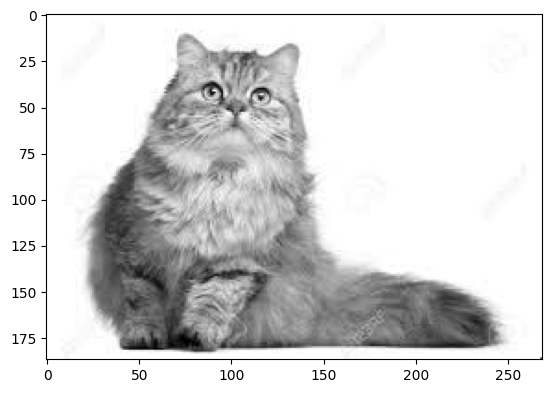

In [ ]:
#Transformando a imagem em cinza

from numpy.core.fromnumeric import shape
import matplotlib.pyplot as plt
from skimage.io import imread,imsave, imshow
import numpy as np


image = imread ('/content/gato.jpeg')

red = image[:,:,0]
green = image[:,:,1]
blue = image[:,:,2]
gray = image [:,:,0]

for i in range(image.shape[0]):
  for j in range(image.shape[1]):

    x = red[i][j] + green[i][j] + blue[i][j]

gray [i][j]= x/3

plt.figure()
plt.imshow(gray,cmap = 'gray')

img = np.zeros((image.shape[0],image.shape[1],3),'uint8')

img[:,:,0] = gray
img[:,:,1] = gray
img[:,:,2] = gray

imsave('/content/cinza.png', img)



RUIDO -> SUAVIZAR -> BORDAS

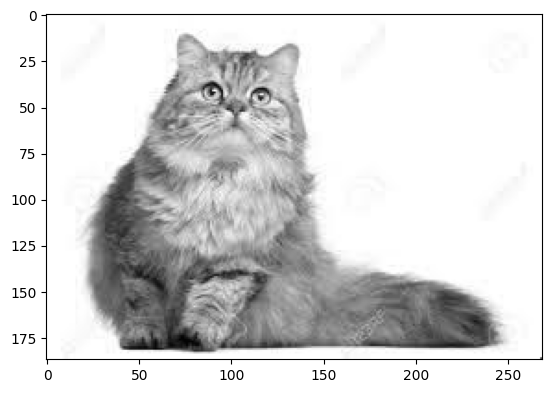

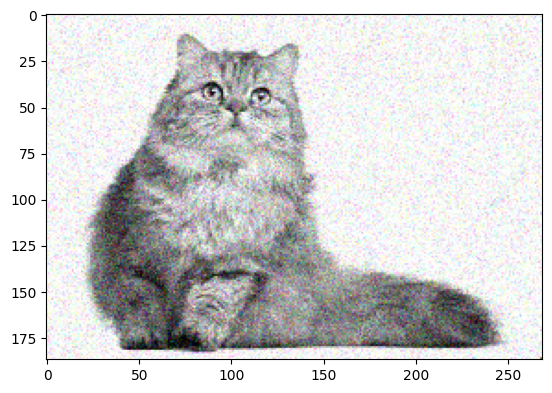

In [ ]:
#ruido
from skimage.util import random_noise
from skimage import restoration
import matplotlib.pyplot as plt
from skimage.io import imread,imsave, imshow

img = imread('/content/cinza.png')


gaussian = random_noise(img, 'gaussian')


#sem ruido
plt.figure()
plt.imshow(img,cmap = 'gray')
#com ruido
plt.figure()
plt.imshow(gaussian,cmap = 'gray')

imsave('/content/cinzaruido.png', gaussian)

<ipython-input-7-eb00f4852381>:11: RuntimeWarning: overflow encountered in ubyte_scalars
  s[i][j] = (img[i][j] + img[i][j+1] + img[i+1][j] + img[i+1][j+1])/4


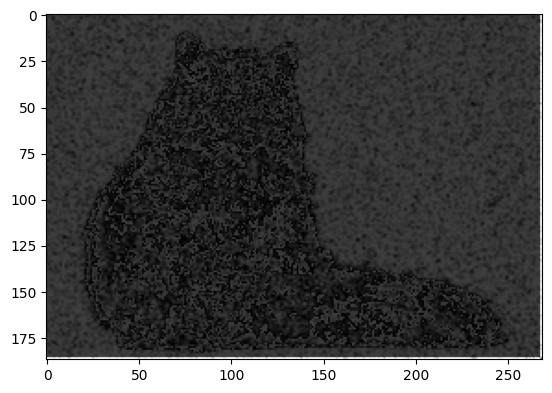

In [ ]:
#suavização
image = imread('/content/cinzaruido.png')


img = image [:,:,0]
s = image [:,:,0] #suavização

s[i][j]
for i in range (img.shape[0]-1):
  for j in range (img.shape[1]-1):
    s[i][j] = (img[i][j] + img[i][j+1] + img[i+1][j] + img[i+1][j+1])/4

plt.figure()
plt.imshow(img,cmap = 'gray')

imsave('/content/cinzsuavizado.png', img)

In [ ]:
#bordas
from skimage.filters import sobel, roberts, prewitt, scharr
from skimage.filters import threshold_otsu, threshold_yen, threshold_isodata, threshold_li

image = imread('/content/cinzsuavizado.png')

def binThresholdOtsu(img):
    thresh = threshold_otsu(img)
    binary = img < thresh
    return binary

def binThresholdYen(img):
    thresh = threshold_yen(img)
    binary = img < thresh
    return binary

def binThresholdIsodata(img):
    thresh = threshold_isodata(img)
    binary = img < thresh
    return binary

def binThresholdLi(img):
    thresh = threshold_li(img)
    binary = img < thresh
    return binary


otsu = binThresholdOtsu(img)
yen = binThresholdYen(img)
isodata = binThresholdIsodata(img)
li = binThresholdLi(img)

bordaOtsu = sobel(image)
bordaYen = roberts(image)
bordaIsoData = prewitt(image)
bordaLi = scharr(image)


op_roberts = roberts(img)
op_sobel = sobel(img)
op_scharr = scharr(img)
op_prewitt = prewitt(img)

plt.figure()
plt.imshow(op_roberts,cmap = 'gray')
plt.figure()
plt.imshow(op_sobel,cmap = 'gray')
plt.figure()
plt.imshow(op_scharr,cmap = 'gray')
plt.figure()
plt.imshow(op_prewitt,cmap = 'gray')

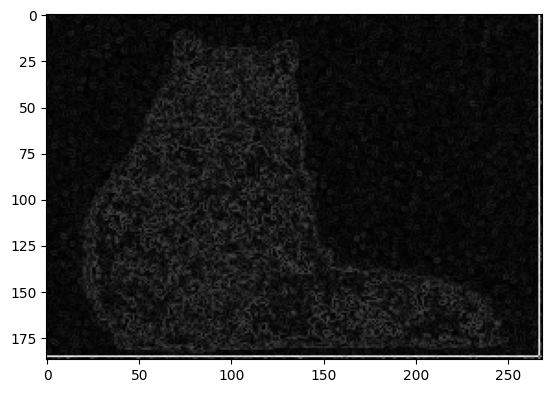

In [ ]:
from skimage.filters import sobel, roberts, prewitt, scharr
from skimage.filters import threshold_otsu, threshold_yen, threshold_isodata, threshold_li


img = imread('/content/cinzsuavizado.png')

op_roberts = roberts(img)
op_sobel = sobel(img)
op_scharr = scharr(img)
op_prewitt = prewitt(img)



plt.figure()
plt.imshow(op_roberts, cmap = 'gray')

imsave('/content/borda.png', img)